<a href="https://colab.research.google.com/github/hpbowala/ComputerVisionAssignment/blob/main/249290X_ComputerVisionAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [2]:
#connect drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
base_path = '/content/drive/MyDrive/ComputerVissionAssignment/a1images/'

### Question 1

In [4]:
#read image from the folder
q1b_image_path = base_path + 'emma.jpg'
q1b_image = cv.imread( q1b_image_path, cv.IMREAD_GRAYSCALE)
assert q1b_image is not None
#display image
#cv2_imshow(q1b_image)


In [5]:
c = np.array([(50, 50), (51, 100), (150,100),(151,255)])

t1 = np.linspace(0, c[0,1], c[0,0]+1-0).astype('uint8')
#51, 100, num = 100 - 50
t2 = np.linspace(c[0,1]+1, c[1,1], c[1,0]-c[0,0]).astype('uint8')
t3 = np.linspace(c[1,0]+1, c[2,1], c[2,0]-c[1,0]).astype('uint8')  # 52 → 150
t4 = np.linspace(c[2,0]+1, 255, 255-c[2,0]).astype('uint8')

In [6]:
print(0, c[0,1], c[0,0]+1-0)
print(c[0,1]+1, c[1,1], c[1,0]-c[0,0])
print(c[1,0]+1, c[2,1], c[2,0]-c[1,0])
print(c[2,0]+1, c[3,1], 255-c[2,0])

0 50 51
51 100 1
52 100 99
151 255 105


In [7]:
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
transform = np.concatenate((transform, t4), axis=0).astype('uint8')
image_transformed = cv.LUT(q1b_image, transform)


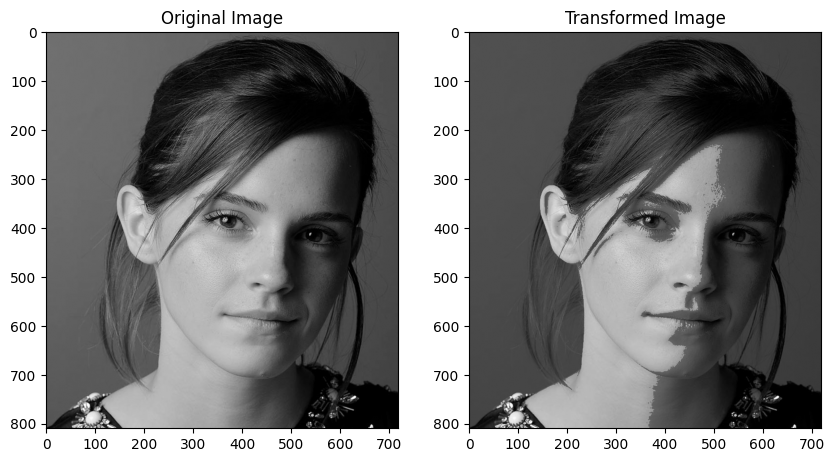

In [8]:
fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(q1b_image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_transformed, cmap='gray')
ax[1].set_title('Transformed Image')
plt.show()

### Question 2

In [49]:
q2_img_path = base_path + "brain_proton_density_slice.png";
q2_img = cv.imread(q2_img_path, cv.IMREAD_GRAYSCALE)
assert q2_img is not None

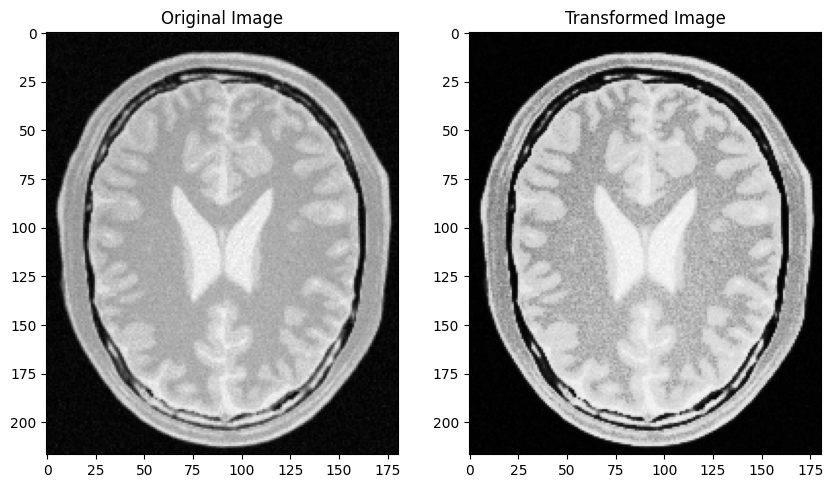

In [96]:
#accentuate gray matter and white matter

cntrlpt2 = np.array([(100, 40), (180, 200), (255, 255)])

q2t1 = np.linspace(0, cntrlpt2[0,1], cntrlpt2[0,0]-0 + 1).astype('uint8')
q2t2 = np.linspace(cntrlpt2[0,1]+1, cntrlpt2[1,1], cntrlpt2[1,0]-cntrlpt2[0,0]).astype('uint8')
q2t3 = np.linspace(cntrlpt2[1,1]+1, cntrlpt2[2,1], cntrlpt2[2,0]-cntrlpt2[1,0]).astype('uint8')

q2_transform = np.concatenate((q2t1, q2t2), axis=0).astype('uint8')
q2_transform = np.concatenate((q2_transform, q2t3), axis=0).astype('uint8')
q2_transformed = cv.LUT(q2_img, q2_transform)

fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(q2_img, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(q2_transformed, cmap='gray')
ax[1].set_title('Transformed Image')
plt.show()


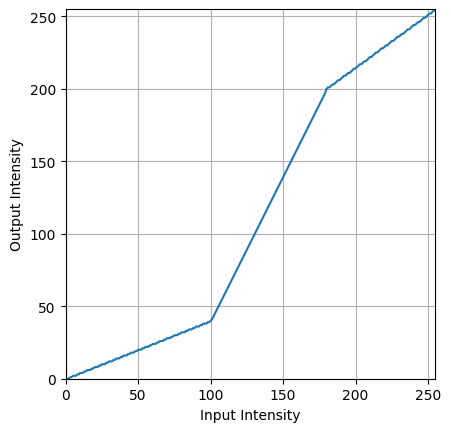

In [101]:
#plot graph
fig, ax = plt.subplots()
ax.plot(q2_transform)
ax.set_xlabel(r'Input Intensity')
ax.set_ylabel('Output Intensity')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.grid(True)
plt.show()

256


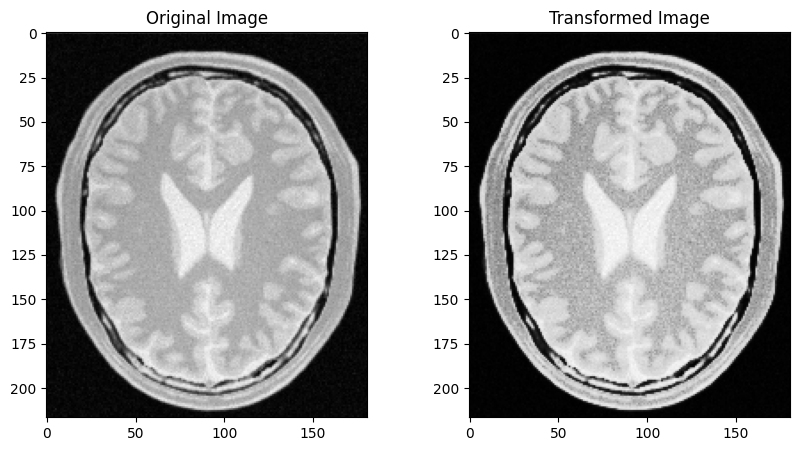

In [84]:
cntrlpt2 = np.array([(0, 0), (100, 40), (180, 200), (255, 255)])

q2_t1 = np.linspace(cntrlpt2[0, 1], cntrlpt2[1, 1], cntrlpt2[1, 0] - cntrlpt2[0, 0] + 1, endpoint=True).astype('uint8')
q2_t2 = np.linspace(cntrlpt2[1, 1], cntrlpt2[2, 1], cntrlpt2[2, 0] - cntrlpt2[1, 0] + 1, endpoint=True).astype('uint8')
q2_t3 = np.linspace(cntrlpt2[2, 1], cntrlpt2[3, 1], cntrlpt2[3, 0] - cntrlpt2[2, 0] + 1, endpoint=True).astype('uint8')


q2_transform = np.concatenate((q2_t1[:-1], q2_t2[:-1], q2_t3), axis=0).astype('uint8')

print(len(q2_transform))

q2_transformed = cv.LUT(q2_img, q2_transform)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(q2_img, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(q2_transformed, cmap='gray')
ax[1].set_title('Transformed Image')
plt.show()
